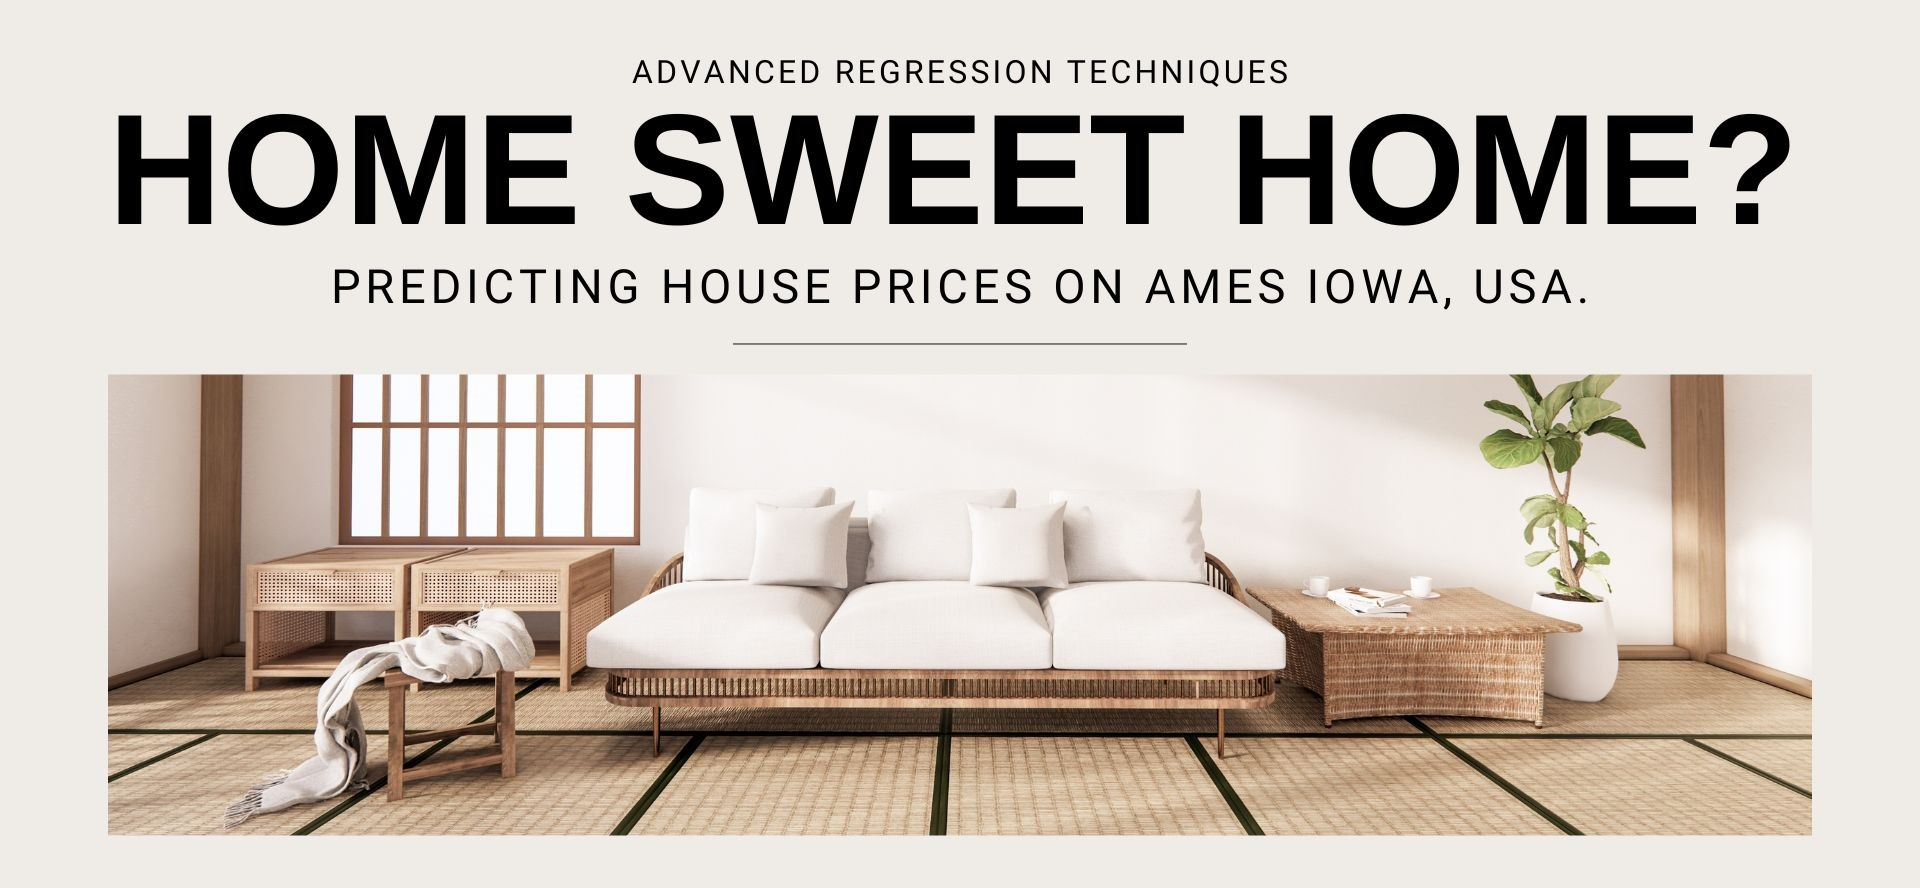

**Prepared by**:

<br>
Van Julius Leander G. Lopez
<br>
Master of Science in Data Science
<br>
Asian Institute of Management
<br>
2022-10210

**Data Source**:
    
Ames Housing Dataset: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

***

### Introduction
***
I prepared this notebook as a practice for the exploratory data analysis, feature engineering, model selection and model deployment. As I progress through my MSDS journey, I will be updating this notebook to keep track of the learnings and different processes that I will be picking up along the way.

### Modules Imported:
***

In [48]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
sns.set_style("whitegrid")
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.precision', 4)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_classif

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

from tabulate import tabulate
from tqdm.notebook import trange
from tqdm.notebook import tqdm
from IPython.display import display, HTML
import time

### Loading the Dataset:
***

In [2]:
df_ames = pd.read_csv('AmesHousing.csv')
X, y = df_ames.drop(columns=['SalePrice']), df_ames.SalePrice

In [3]:
X.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [4]:
y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

### Exploratory Data Analysis:
***
In the exploratory data analysis phase, we have to first investigate the dataset's characteristics. This will determine which steps to take in further processing the data.

* Total Number of Samples
* Total Number of Categorical Features
* Total Number of  Numerical Features
* Null Values DataFrame

In [5]:
def get_cat_num_df(df):
    """This function will return the numerical and
    categorical dataframes with the original dataframe as an input"""
    num_df = []
    cat_df = []
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_df.append(col)
                
        if is_object_dtype(df[col]):
            cat_df.append(col)
    return num_df, cat_df


def get_null_df(df):
    """This function will return the null dataframe with
    the original dataframe as an input"""
    null_df = pd.DataFrame(columns = ['Column', 'Type', 'Total NaN', '%'])
    col_null = df.columns[df.isna().any()].to_list()
    L = len(df)
    for i, col in enumerate(col_null):
        T = 0
        if is_numeric_dtype(df[col]):
            T = "Numerical"  
        else:
            T = "Categorical"
        nulls = len(df[df[col].isna() == True][col])
        null_df.loc[i] = {'Column': col, 
                          'Type': T,
                          'Total NaN': nulls,
                          '%': (nulls / L)*100}
    return null_df


# Total Samples
print(f'The Total Number of Samples: {len(df_ames)}' )

# Total Features
print(f'The Total Number of Features: {len(X.columns)}')

# Total Categorical Features and Total Numerical Features
num_features, cat_features = get_cat_num_df(X)
print(f'The Total Number of Categorical Features: {len(cat_features)}')
print(f'The Total Number of Numerical Features: {len(num_features)}')

# Null Values DataFrame
null_df = get_null_df(df_ames)
out_null = null_df.sort_values(by='%', ascending=False).head(10)
print('The Top 10 columns with NaN values')
display(HTML(out_null.to_html()))

The Total Number of Samples: 2930
The Total Number of Features: 81
The Total Number of Categorical Features: 43
The Total Number of Numerical Features: 38
The Top 10 columns with NaN values


,Column,Type,Total NaN,%
24,Pool QC,Categorical,2917,99.5563
26,Misc Feature,Categorical,2824,96.3823
1,Alley,Categorical,2732,93.2423
25,Fence,Categorical,2358,80.4778
16,Fireplace Qu,Categorical,1422,48.5324
0,Lot Frontage,Numerical,490,16.7235
23,Garage Cond,Categorical,159,5.4266
22,Garage Qual,Categorical,159,5.4266
19,Garage Finish,Categorical,159,5.4266
18,Garage Yr Blt,Numerical,159,5.4266


From above table, we can observe that there are multiple columns that contains a high number of Nulls. For further processing, we have to perform null handling. 

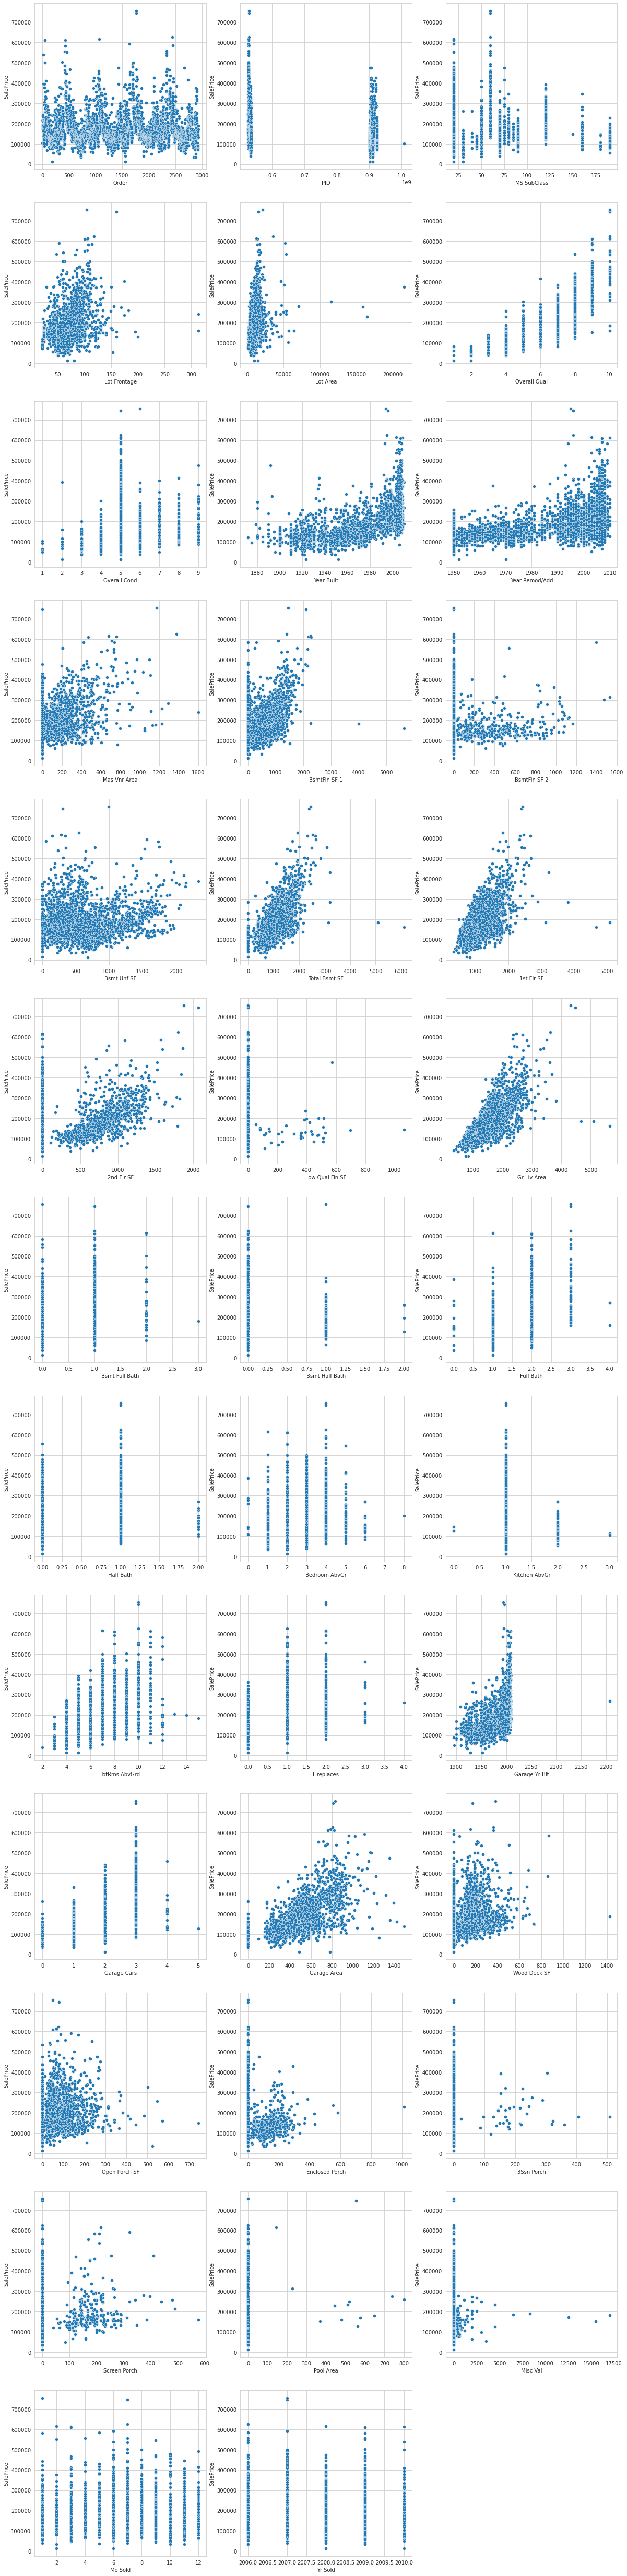

In [6]:
# We now have to investigate the numerical features

# To determine the relationship of the different features with
# the target, we have to plot them on a scatter plot

plt.figure(figsize=(20, 90))
for i in range(len(num_features)):
    plt.subplot(13, 3, i+1)
    sns.scatterplot(x=df_ames[num_features[i]], y=y)
plt.show()

From the scatter plots above, we can see that there are some features that have a positive correlation with the sale price such as Overall Qual and Garage Area which shows that as these features increases, the sale price also increases. It can also be observed that the other features have no relationship with the Sale Price.

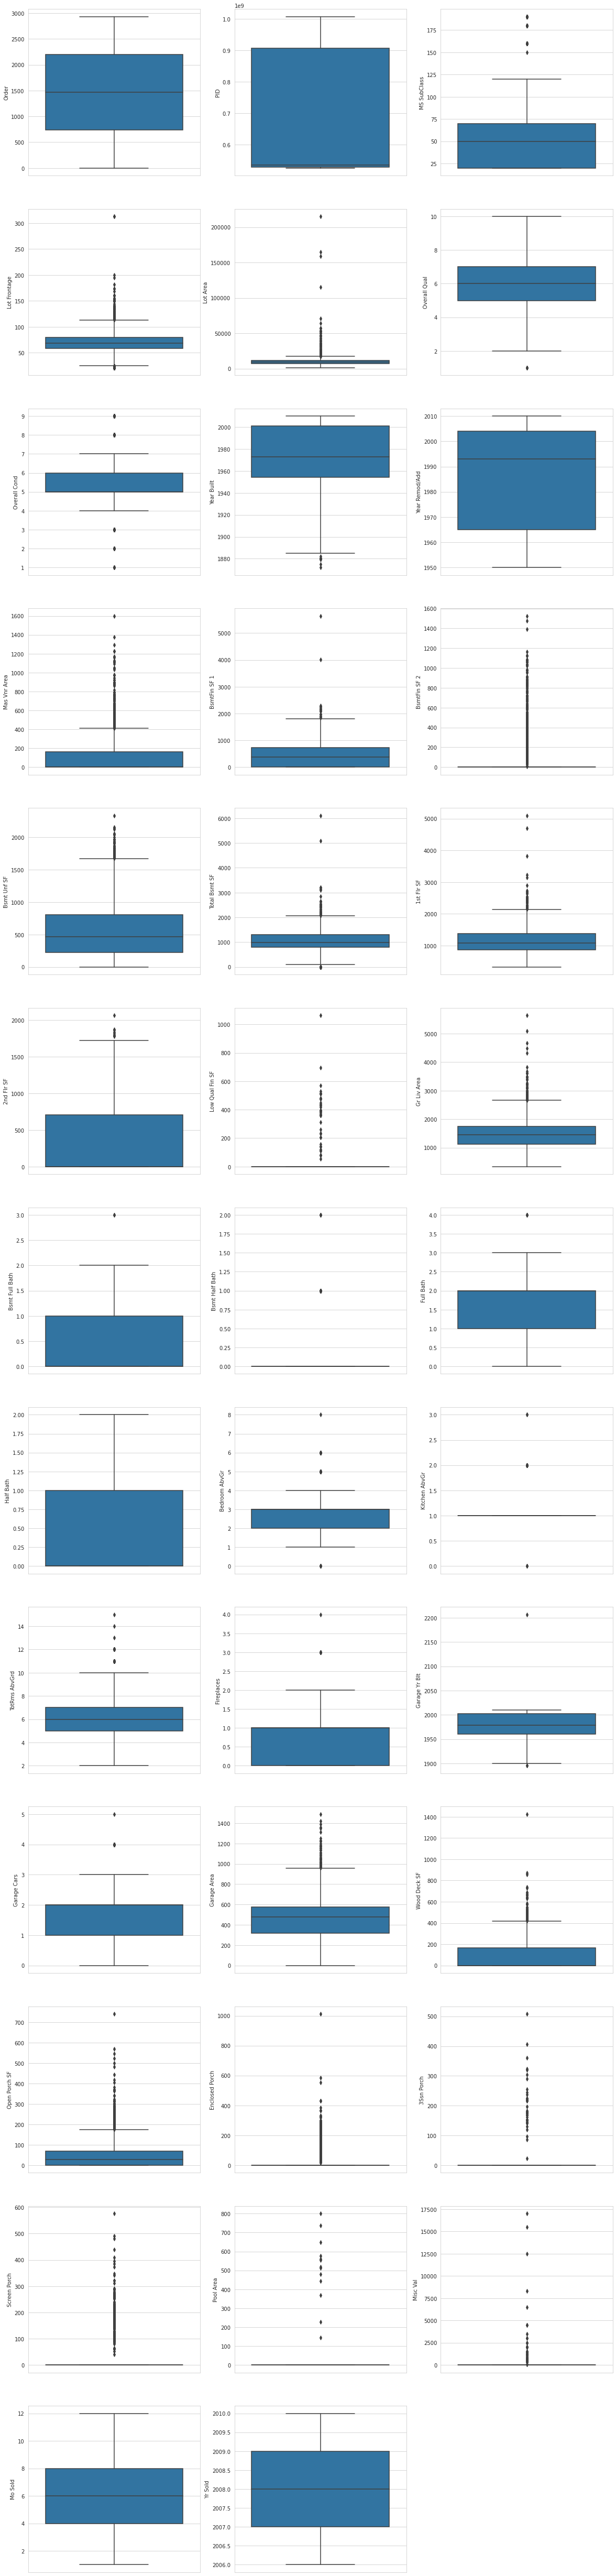

In [7]:
# We now have to check each feature for outliers using box plots

plt.figure(figsize=(20,90))
for i in range(len(num_features)):
    plt.subplot(13, 3, i+1)
    sns.boxplot(y=df_ames[num_features[i]])
plt.show()

From the box plots above, we can see that there are a lot of outliers across the different features. Some of the features also has a tight interquartile range. With the problem statement, we know that we have to perform outlier handling since outliers in our data doesn't contain valuable information.

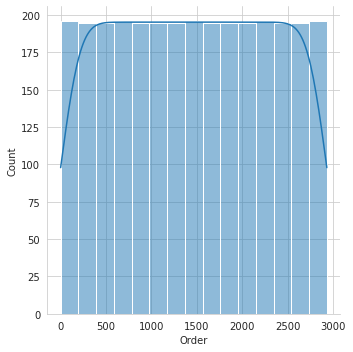

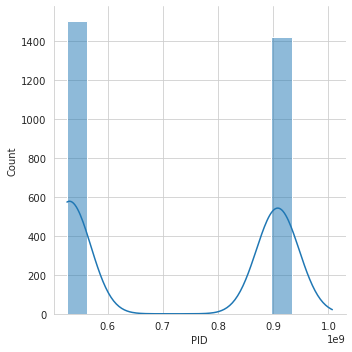

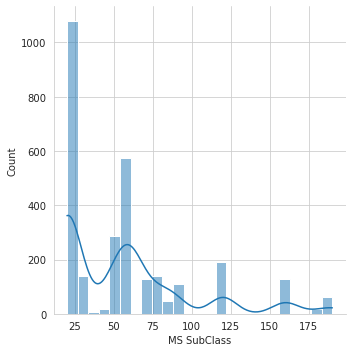

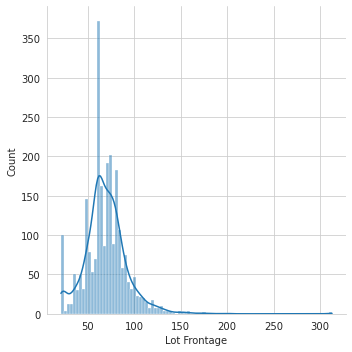

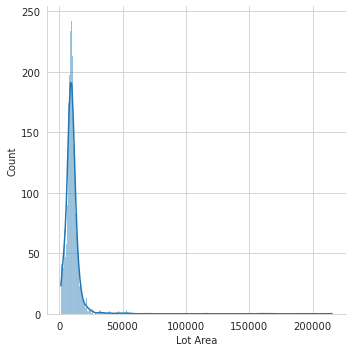

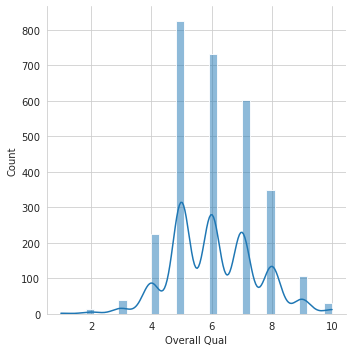

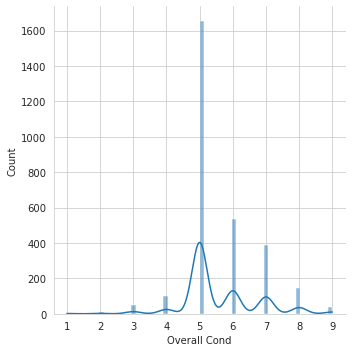

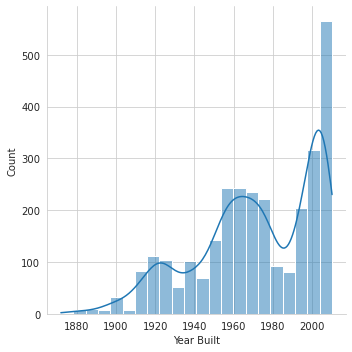

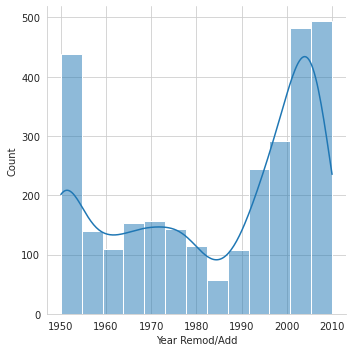

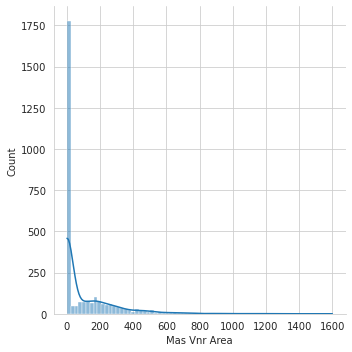

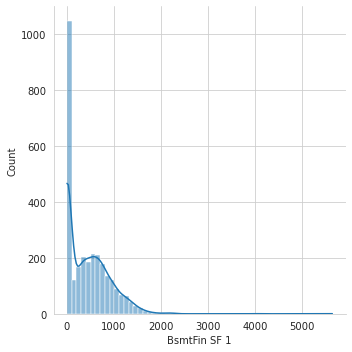

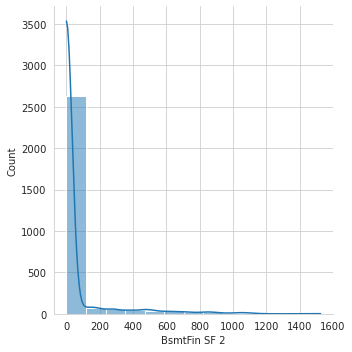

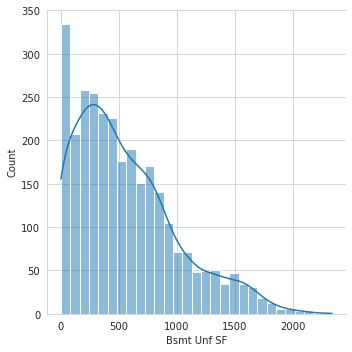

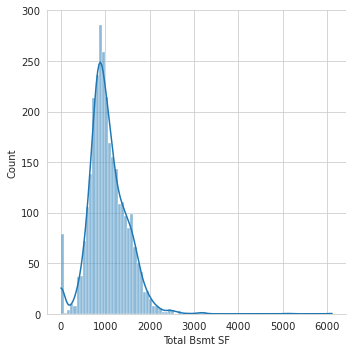

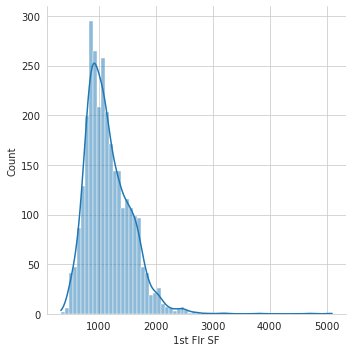

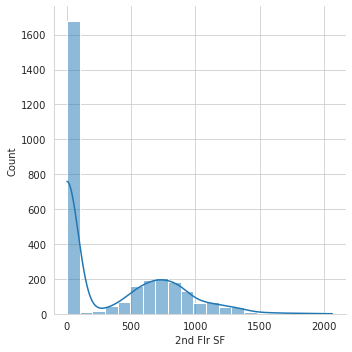

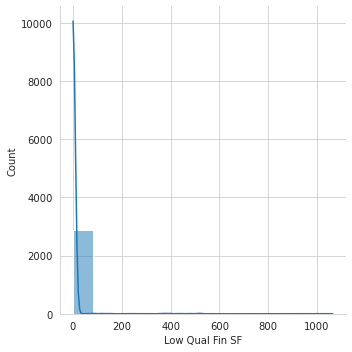

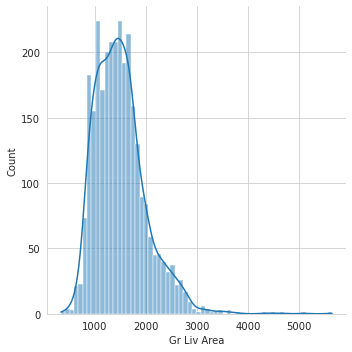

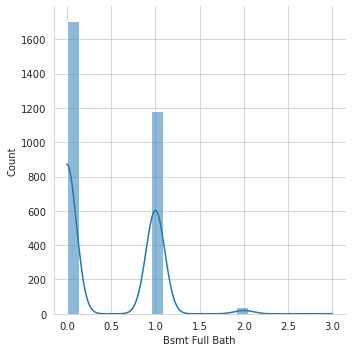

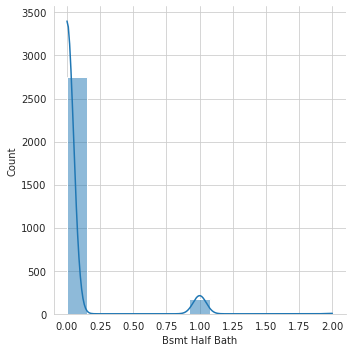

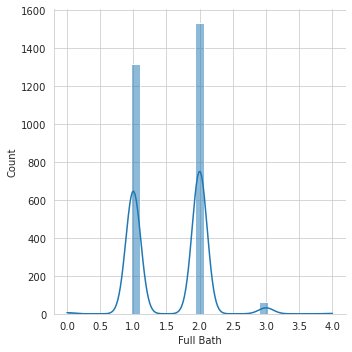

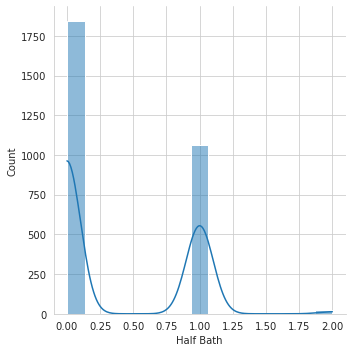

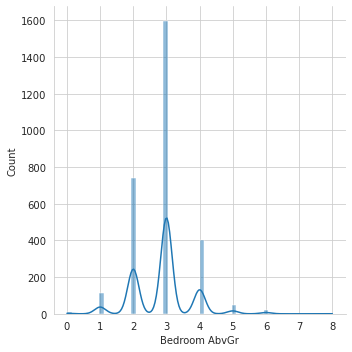

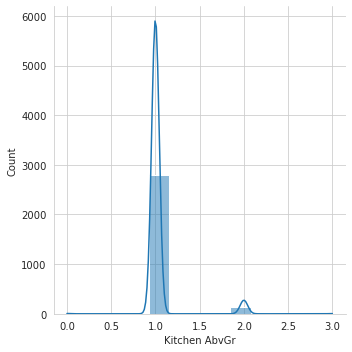

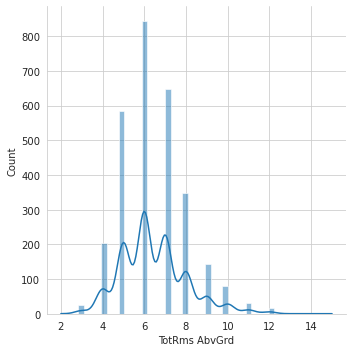

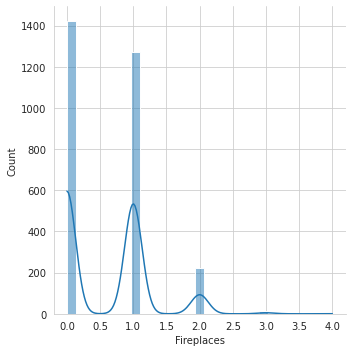

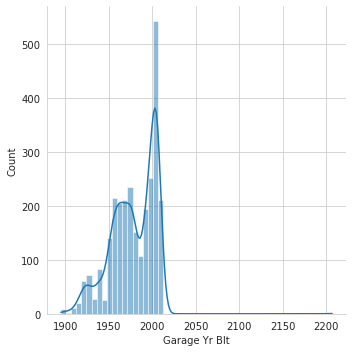

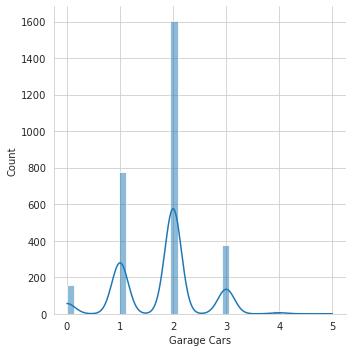

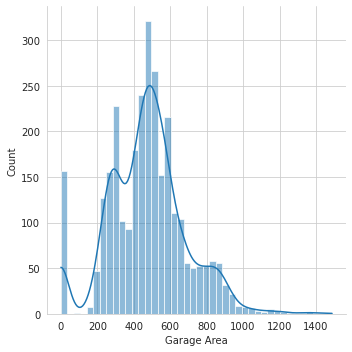

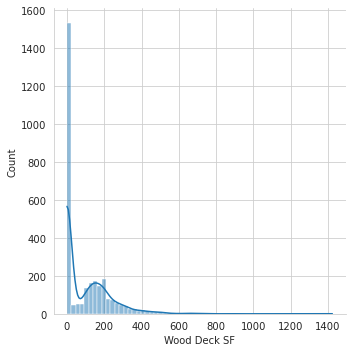

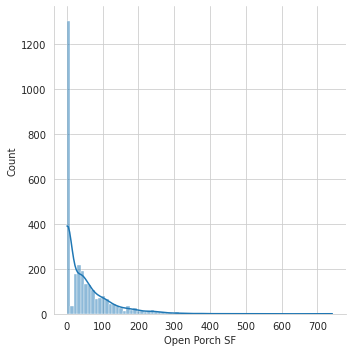

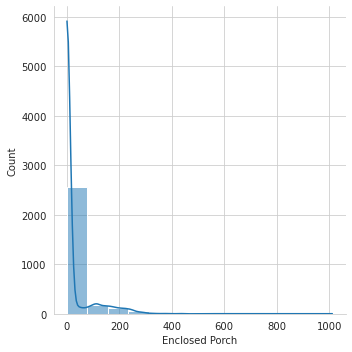

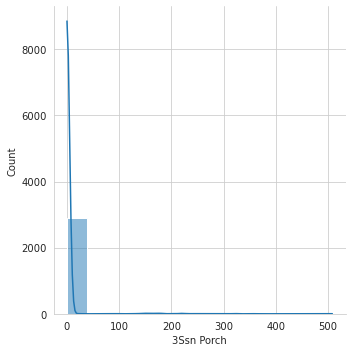

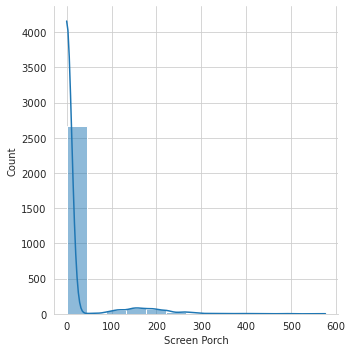

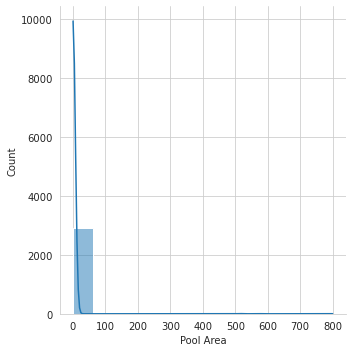

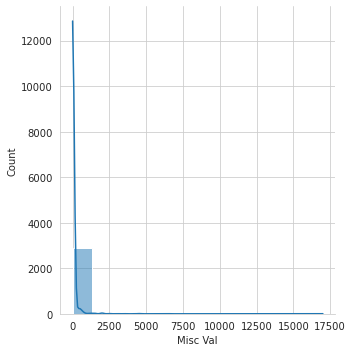

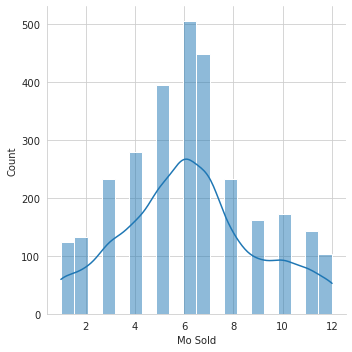

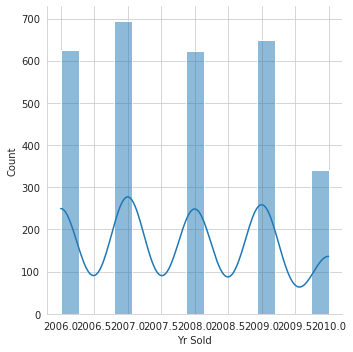

In [8]:
# We also have to check the different distributions to 
# determine if we have to perform scaling on our dataset

for i in num_features:
    sns.displot(x=df_ames[i], kde=True)
    plt.show()

From the different distribution plots we have above, we can observe that almost all of the features do not follow a normal distribution. With this, we know that we have to perform standard scaling on the features before we further process our data.

### Data Preprocessing:
***
In the data preprocesssing phase, we will be cleaning the data according to the insights we gathered from the exploratory data analysis phase. The preprocessing steps are as follows:
- Drop Duplicates using the PID column
- Drop Columns with more than 80% Null Values
- Drop Uninformative Columns like the PID and the Order
- Impute Null Values of the Columns with less than 80% Null Values
- Create New Features
- Outlier Handling by Calculating the Interquartile Range
- Scaling the Feature Values

In [9]:
def imputation(col_null_df, df):
    """This function will impute NaN values for both
    the categorical and numerical features"""
    for ind, row in col_null_df.iterrows():
        col = row['Column']
        if row['Type'] == 'Categorical':
            df[col].fillna('NotAvail', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    return df


def calc_interquartile(df, column):
    """This function will calculate the interquartile range
    for outlier handling"""
    first_quartile, third_quartile = (
        np.percentile(df[column], 25), np.percentile(df[column], 75)
    )
    iqr = third_quartile - first_quartile
    cutoff = iqr*1.5
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    return lower, upper, lower_outliers.shape[0]+upper_outliers.shape[0]


def get_outliers(df, num_feat):
    """This function will get the outliers with respect to the
    original dataframe and numerical features list"""
    outlier_df = (
        pd.DataFrame(columns=['Feature',
                              'Total Outliers',
                              'Upper limit',
                              'Lower limit'])
    )
    for i, col in enumerate(num_feat):
        lower, upper, total = calc_interquartile(df, col)
        if total != 0 and (upper !=0 and lower!=0):
            outlier_df.loc[i]= {'Feature':col,
                                'Total Outliers': total,
                                'Upper limit': upper,
                                'Lower limit':lower}
    return outlier_df


def remove_outliers(df, outlier_df, num_feat):
    """This function will drag the outliers back to the interquartile range
    range for the result of outlier handling"""
    for col in outlier_df['Feature'].to_list():
        upper = (
            outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        )
        lower = (
            outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        )
        df[col] = np.where(df[col]>upper, upper, df[col])
        df[col] = np.where(df[col]<lower, lower, df[col])
    return df


def create_new_features(cleaned_df):
    """This function is fine tuned for this dataset where it will
    generate additional columns and change the numerical values
    of the subclass and month sold to make it categorical"""
    cleaned_df['Remod_Built_Age'] = (
        cleaned_df['Year Remod/Add'] - cleaned_df['Year Built']
    )
    cleaned_df['Sold_Built_Age'] = (
        cleaned_df['Yr Sold'] - cleaned_df['Year Built']
    )
    cleaned_df['Remod_Sold_Age'] = (
        cleaned_df['Yr Sold'] - cleaned_df['Year Remod/Add']
    )
    cleaned_df['MS SubClass'].replace({20:"1-STORY 1946 & NEWER",
                               30:"1-STORY 1945 & OLDER",
                               40:"1-STORY W/FINISHED",
                               45:"1-1/2 STORY - UNFINISHED",
                               50:"1-1/2 STORY FINISHED",
                               60:"2-STORY 1946 & NEWER",
                               70:"2-STORY 1945 & OLDER",
                               75:"2-1/2 STORY ALL AGES",
                               80:"SPLIT OR MULTI-LEVEL",
                               85:"SPLIT FOYER",
                               90:"DUPLEX",
                               120:"1-STORY PUD",
                               150:"1-1/2 STORY PUD",
                               160:"2-STORY PUD",
                               180:"PUD - MULTILEVEL",
                               190:"2 FAMILY CONVERSION"                         
                              },inplace=True)
    cleaned_df['Mo Sold'].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",
                                   5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
                                   9:"Sep",10:"Oct",11:"Nov",12:"Dec"},
                                  inplace=True)
    return cleaned_df


def transformed_feat(trans_df, num_feat):
    """This function will transform the original dataframe with
    respect to the numerical features list"""
    for col in num_feat:
        t = ss_scaler.fit_transform(np.array(trans_df[col]).reshape(-1,1))
        trans_df[col] = t.reshape(-1)
    return trans_df


# Dropping duplicates 
X_cleaned = X.drop_duplicates(subset=['PID'])
print(f'Total Number of Duplicated rows are: {len(X) - len(X_cleaned)}')


# Dropping Columns with more than 80% null values
null_X = get_null_df(X_cleaned)
null_cols_list = null_X[null_X['%']>=80]['Column'].to_list()
X_cleaned.drop(null_cols_list, axis=1, inplace=True)
null_X.sort_values(by='%', ascending=False, inplace=True)


# Imputing the Remaining null values in the DataFrame
X_cleaned_new = imputation(null_X.iloc[4:], X_cleaned)


# Verify that the NaN values are no longe rpresent in the dataset
print(f'NaN values present in the Dataset:'
      f'{X_cleaned_new.columns[X_cleaned_new.isna().any()]}')


# Dropping Irrelevant DataFrame Columns
X_cleaned_new.drop(['PID', 'Order'], axis=1, inplace=True)


# Creating New Features
X_cleaned_new = create_new_features(X_cleaned_new)


# Outlier handling
num_feat, _ = get_cat_num_df(X_cleaned_new)
outlier_df = get_outliers(X_cleaned_new, num_feat)
X_cleaned_fin = remove_outliers(X_cleaned_new, outlier_df, num_feat)
outliers_rem = get_outliers(X_cleaned_fin, num_feat)
print(f'The total number of features with outliers handled are: '
      f'{len(outlier_df)} \nand the number of remaining outliers after '
      f'handling are: {len(outliers_rem)}')


# Scaling the Feature Values
ss_scaler = StandardScaler()
trans_df = X_cleaned_fin.copy()
num_feat, _ = get_cat_num_df(trans_df)
trans_df_new = transformed_feat(trans_df, num_feat)
trans_df_new[num_feat].head()

Total Number of Duplicated rows are: 0
NaN values present in the Dataset:Index([], dtype='object')
The total number of features with outliers handled are: 25 
and the number of remaining outliers after handling are: 0


,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Remod_Built_Age,Sold_Built_Age,Remod_Sold_Age
0,2.1470,2.2561,-0.0684,-0.5643,-0.3766,-1.1635,0.1848,0.4556,-0.2939,-0.2676,0.0852,1.3807,-0.7842,-0.101,0.3557,1.0882,-0.2492,-1.0286,-0.7552,0.2148,0.0,0.3896,2.1965,-0.7415,0.3145,0.2757,1.0273,0.3454,-0.3588,-0.1031,-0.2854,-0.063,-0.0894,1.6785,-0.6094,0.4491,1.2695
1,0.6799,0.5697,-0.7795,0.4861,-0.3435,-1.1155,-0.6583,0.0651,0.5576,-0.6645,-0.4005,-0.7059,-0.7842,-0.101,-1.2674,-0.8233,-0.2492,-1.0286,-0.7552,-1.0907,0.0,-0.9472,-0.9341,-0.7006,-1.0162,1.2455,0.4226,-0.8149,-0.3588,-0.1031,1.8545,-0.063,-0.0894,1.6785,-0.6094,0.4161,1.2216
2,0.7386,1.3003,-0.0684,0.4861,-0.4428,-1.2594,0.1547,1.1041,-0.2939,-0.3489,0.6960,0.4829,-0.7842,-0.101,-0.3427,-0.8233,-0.2492,-1.0286,1.2347,0.2148,0.0,-0.2788,-0.9341,-0.8233,-1.0162,-0.7612,2.6082,-0.1412,-0.3588,-0.1031,-0.2854,-0.063,21.9857,1.6785,-0.6094,0.5153,1.3654
3,1.4428,0.4421,0.6426,-0.5643,-0.1116,-0.7799,-0.6583,1.4284,-0.2939,1.1344,2.4995,2.6272,-0.7842,-0.101,1.3253,1.0882,-0.2492,0.7891,1.2347,0.2148,0.0,1.0580,2.1965,-0.4145,0.3145,0.2469,-0.7869,-0.8149,-0.3588,-0.1031,-0.2854,-0.063,-0.0894,1.6785,-0.6094,0.1846,0.8859
4,0.3278,1.1796,-0.7795,-0.5643,0.8488,0.6585,-0.6583,0.8027,-0.2939,-0.9733,-0.2877,-0.6181,0.8558,-0.101,0.2980,-0.8233,-0.2492,0.7891,1.2347,0.2148,0.0,-0.2788,0.6312,0.7708,0.3145,0.0549,1.0446,-0.1786,-0.3588,-0.1031,-0.2854,-0.063,-0.0894,1.6785,-0.5487,-0.7744,-0.5526


### Feature Selection and Encoding:
***
After cleaning the data, we now have to select the features using Pearson's correlation coefficient with mutual info regression for strong numerical features and ANOVA with f classif for the strong categorical features. We then have to encode the categorical features where the lists for the ordinal-categorical features and the nominal-categorical features are manually defined. The ordinal features are label encoded while the nominal features are dummy encoded.

In [10]:
def encode_feat(nom_feat, ord_feat, yr_cols, df, t_df=pd.DataFrame()):
    """This function is fine tuned for this dataset to encode
    both the ordinal and nominal categorical features"""
    le = LabelEncoder()
    for col in ord_feat:
        le.fit(ord_dict[col])
        df[col] = le.transform(df[col])
        if len(t_df) != 0:
            t_df[col] = le.transform(t_df[col])
    for col in yr_cols:
        df[col] = le.fit_transform(df[col])
        if len(t_df) != 0:
            t_df[col] = le.transform(t_df[col])
    for col in nom_feat:
        dum = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dum], axis=1)
        df.drop([col], axis=1, inplace=True)
        if len(t_df) != 0:
            t_df = pd.concat([t_df, dum], axis=1)
            t_df.drop([col], axis=1, inplace=True)
    if len(t_df) != 0:
        return df, t_df
    else:
        return df

    
def lab_encode_feat(df):
    """This function will label encode the original dataframe"""
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])
    return df


yr_cols = ['Year Built', 'Garage Yr Blt', 'Year Remod/Add']

# The List of Ordinal Features
ordinal_feat = ['Lot Shape','Land Slope', 'Exter Qual', 'Exter Cond',
                'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
                'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual',
                'Fireplace Qu','Garage Qual', 'Garage Cond' , 'Utilities']


# The List of Categorical Features
nominal_feat = ['MS SubClass', 'MS Zoning','Street', 'Lot Config',
                'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
                'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
               'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
                'Central Air', 'Electrical', 'Functional', 'Garage Type',
                'Garage Finish', 'Paved Drive','Sale Type', 'Sale Condition', 
                'Land Contour', 'Mo Sold']


# # Dictionary of all the ordinal categorical features
ord_dict = (
    {"Lot Shape": ['Reg','IR1','IR2','IR3', 'NotAvail'],
     "Land Slope" : ["Gtl", "Mod", "Sev",'NotAvail' ],
     "Exter Qual": [  "Ex", "Gd", "TA", "Fa", "Po", 'NotAvail' ],
     "Exter Cond": [  "Ex", "Gd", "TA", "Fa", "Po", 'NotAvail' ],
     "Bsmt Qual": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Bsmt Cond":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Bsmt Exposure": ["Gd", "Av", "Mn", "No", "NA", 'NotAvail'],
     "BsmtFin Type 1":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NotAvail'],
     "BsmtFin Type 2":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NotAvail'],
     "Heating QC": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Kitchen Qual": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Fireplace Qu":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Garage Qual":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Garage Cond": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
     "Utilities":  [ "AllPub", "NoSewr", "NoSeWa","ELO", "NotAvail"]
    }
)


# defining the numerical dataframe and the categorical dataframe
num_feat, cat_feat = get_cat_num_df(trans_df_new)
num_df = trans_df_new[num_feat]
cat_df = trans_df_new[cat_feat]


# Selecting the top 20 numerical features
num_fs_new = SelectKBest(score_func=mutual_info_regression, k=20)
num_fs_new.fit(num_df, y)
cols  = num_fs_new.get_support(indices=True)
best_num_df_new = num_df.iloc[:,cols]


# Selecting the top 30 categorical features
cat_df = lab_encode_feat(cat_df) 
cat_fs_new = SelectKBest(score_func=f_classif, k=30)
cat_fs_new.fit(cat_df, y)
cols = cat_fs_new.get_support(indices=True)
best_cat_df_new = cat_df.iloc[:, cols]

# Constructing the DataFrame containing the features with
# strong correlation with the target column
best_cols_new = (
    best_num_df_new.columns.to_list() + best_cat_df_new.columns.to_list()
)
best_feat_df_new = trans_df_new[best_cols_new]

# strong nominal and ordinal columns
nom_cols = []
ord_cols = []
for col in best_cat_df_new.columns.to_list():
    if col in nominal_feat:
        nom_cols.append(col)
    else:
        ord_cols.append(col)

# Encoding the Feature Selected DataFrame
best_feat_df_new = encode_feat(nom_cols, ord_cols, yr_cols, best_feat_df_new)
display(HTML(best_feat_df_new.head(10).to_html()))

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Open Porch SF,Sold_Built_Age,Remod_Sold_Age,Lot Shape,Utilities,Land Slope,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,MS SubClass_1-1/2 STORY - UNFINISHED,MS SubClass_1-1/2 STORY FINISHED,MS SubClass_1-1/2 STORY PUD,MS SubClass_1-STORY 1945 & OLDER,MS SubClass_1-STORY 1946 & NEWER,MS SubClass_1-STORY PUD,MS SubClass_1-STORY W/FINISHED,MS SubClass_2 FAMILY CONVERSION,MS SubClass_2-1/2 STORY ALL AGES,MS SubClass_2-STORY 1945 & OLDER,MS SubClass_2-STORY 1946 & NEWER,MS SubClass_2-STORY PUD,MS SubClass_DUPLEX,MS SubClass_PUD - MULTILEVEL,MS SubClass_SPLIT FOYER,MS SubClass_SPLIT OR MULTI-LEVEL,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_NotAvail,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NotAvail,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NotAvail,Garage Finish_Fin,Garage Finish_NotAvail,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,2.1470,2.2561,-0.0684,63,10,0.1848,0.4556,0.0852,1.3807,-0.7842,0.3557,-1.0286,0.3896,2.1965,49,0.3145,0.2757,0.3454,0.4491,1.2695,0,0,0,5,6,2,1,1,6,2,6,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.6799,0.5697,-0.7795,64,11,-0.6583,0.0651,-0.4005,-0.7059,-0.7842,-1.2674,-1.0286,-0.9472,-0.9341,50,-1.0162,1.2455,-0.8149,0.4161,1.2216,4,0,0,5,6,6,4,6,6,4,6,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,0.7386,1.3003,-0.0684,61,8,0.1547,1.1041,0.6960,0.4829,-0.7842,-0.3427,-1.0286,-0.2788,-0.9341,47,-1.0162,-0.7612,-0.1412,0.5153,1.3654,0,0,0,5,6

### Model Selection and Evaluation:
***
We will be using all imported sklearn models and compare their accuracy results using their default parameters. The top performing machine learning model will then be used for Hyperparameter Tuning.

In [32]:
pipe_list = []
pipe_list.append(('LinearRegression', Pipeline([('LinearRegression', LinearRegression())])))
pipe_list.append(('Ridge', Pipeline([('Ridge', Ridge())])))
pipe_list.append(('KNeighborsRegressor', Pipeline([('KNeighborsRegressor',KNeighborsRegressor())])))
pipe_list.append(('DecisionTree', Pipeline([('DecisionTree', DecisionTreeRegressor())])))
pipe_list.append(('RandomForest', Pipeline([('RandomForest', RandomForestRegressor())])))
pipe_list.append(('GradientBoosting', Pipeline([('GradientBoosting',GradientBoostingRegressor())])))
pipe_list.append(('AdaBoost', Pipeline([('AdaBoost', AdaBoostRegressor())])))
pipe_list.append(('XGB', Pipeline([('XGB', XGBRegressor())])))
pipe_list.append(('Bagging', Pipeline([('Bagging', BaggingRegressor())])))
pipe_list.append(('BayesianRidge', Pipeline([('BayesianRidge', BayesianRidge())])))
pipe_list.append(('ElasticNet', Pipeline([('Elastic', ElasticNet())])))

seed = 40322
splits = 7
models_score ={}
for i in tqdm(pipe_list):
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], best_feat_df_new, y, cv=kfold)
    models_score.update({i[0] : results.mean()})

model_select = sorted(models_score.items(), key= lambda v:v[1], reverse=True)
model_select

  0%|          | 0/11 [00:00<?, ?it/s]

[('GradientBoosting', 0.9065807806812385),
 ('XGB', 0.903481099609892),
 ('RandomForest', 0.8971680413253752),
 ('Bagging', 0.879603891910465),
 ('BayesianRidge', 0.8710290950922113),
 ('Ridge', 0.8696321717800407),
 ('LinearRegression', 0.8670085636437151),
 ('ElasticNet', 0.8401036090296315),
 ('AdaBoost', 0.8222882930087124),
 ('DecisionTree', 0.7909673321715049),
 ('KNeighborsRegressor', 0.7756823800242689)]

From above results, we can see that Gradient Boosting Method yielded the highest accuracy with the default parameters so we will be using it for Hyperparameter Tuning.

### Hyperparameter Tuning:
***
Using Gradient Boosting Method with the different hyper parameters like n_estimators, max depth, max features and learning rate we will determine which are the best parameters with its corresponding best score.

In [35]:
steps = [('GradientBoosting', GradientBoostingRegressor())]
pipe = Pipeline(steps)

n_estimators = [100, 200, 300]
max_depth = [5, 7, 10]
max_features = [0.01, 0.05, 0.1]
learning_rate = [0.01, 0.05, 0.1]

param_grid = {'GradientBoosting__n_estimators': n_estimators,
              'GradientBoosting__max_depth': max_depth,
              'GradientBoosting__max_features': max_features,
              'GradientBoosting__learning_rate': learning_rate}

cv = 7
scoring = 'r2'

X_train, X_test, y_train, y_test = (
    train_test_split(best_feat_df_new, y, test_size=0.30, random_state=40322)
)

gradient_boosting_grid_search = (
    GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 cv=cv,
                 scoring=scoring,
                 n_jobs=-1,
                 return_train_score=True)
)

gradient_boosting_grid_search.fit(X_train, y_train);

gb_cv_results = gradient_boosting_grid_search.__dict__['cv_results_']

print(f'The best parameters are:\n'
      f'{gradient_boosting_grid_search.best_params_}\n')

print(f'The best score achieved is:\n'
      f'{gradient_boosting_grid_search.best_score_}')

The best parameters are:
{'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__max_depth': 5, 'GradientBoosting__max_features': 0.1, 'GradientBoosting__n_estimators': 200}

The best score achieved is:
0.901449887379706


Using only the best parameters, below is the model that is ready for deployment. The n_estimators is 200, max_depth is 5, max_features is 0.1, while the learning_rate is 0.01. 

In [47]:
start_time = time.time()

gbm_for_deployment = (
    GridSearchCV(estimator=pipe,
                 param_grid={'GradientBoosting__n_estimators': [200],
                             'GradientBoosting__max_depth': [5],
                             'GradientBoosting__max_features': [0.1],
                             'GradientBoosting__learning_rate': [0.1]},
                 cv=cv,
                 scoring=scoring,
                 n_jobs=-1,
                 return_train_score=True)
)

gbm_for_deployment.fit(X_train, y_train);
    
run_time = (time.time() - start_time)
    
gbm_dep_results = gbm_for_deployment.__dict__['cv_results_']
    
gbm_dep_results = pd.DataFrame(
    {'mean_train_score': gbm_dep_results['mean_train_score'],
     'std_train_score': gbm_dep_results['std_train_score'],
     'mean_val_score': gbm_dep_results['mean_test_score'],
     'std_val_score': gbm_dep_results['std_test_score'],
     'run_time': run_time
    })

print('The Results of Gradient Boosting Method with the Hyperparameters:')
display(HTML(gbm_dep_results.to_html()))

The Results of Gradient Boosting Method with the Hyperparameters:


,mean_train_score,std_train_score,mean_val_score,std_val_score,run_time
0,0.9903,0.0007,0.9006,0.0174,25.9154


### Results and Discussions:
***
In this implementation, we first used the pearson's correlation coefficient, select k best with mutual info regression and anova with f classif for feature selection. Pearson’s correlation coefficient measures the statistical relationship, or association, between two continuous variables as a test statistic. It is considered as the best method for measuring the association between variables because it is based on the method of covariance. Information about the magnitude of the association, or correlation, as well as the direction of the relationship is given by this test.

Different advanced machine learning models are used for this dataset and we determined that the gradient boosting method yielded the best score. With the hyperparameter tuning for the gradient boosting method, the highest validation score is achieved without overfitting. 

### References:
***

[1] scikit-learn developers. (n.d.). "pandas.api.types.pandas_dtype". scikit-learn.org. Retrieved November 22, 2022 from https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html

[2] scikit-learn developers. (n.d.). "Feature selection". scikit-learn.org. Retrieved November 22, 2022 from https://scikit-learn.org/stable/modules/feature_selection.html

[3] scikit-learn developers. (n.d.). "Mutual Info Regression". scikit-learn.org. Retrieved November 22, 2022 from 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

[4] Complete dissertation by statistics solutions authors. "Pearson’s Correlation Coefficient". Retrieved November 22, 2022 from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/